책 리스트
1. 핸즈온 머신러닝
2. 파이썬 라이브러리를 활용한 데이터 분석
3. 

## 머신러닝
### 1, 2 군집 분석

활용 데이터: https://www.kaggle.com/code/blanik/kor-e-commerce-data-3-customer-segmentation/data
범주형 + 수치형

1-1. 결측치를 확인하고, 결측치 제거할 것  
1-2. 이상치 제거하는 방법을 설명하고, 이상치 제거한 결과를 통계적으로 나타낼 것  
1-3. 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성할 것  
2-1. 위에서 생성한 군집들의 특성을 분석할 것  
2-2. 각 군집 별 대표추천 상품을 도출할 것  
2-3. CustomerID가 12413인 고객을 대상으로 상품을 추천할 것  

In [176]:
import pandas as pd
import numpy as np

In [97]:
data = pd.read_csv('./data/26_data.csv', delimiter=',', header=0, dtype= {'CustomerID' : str, 'InvoiveID' :  str}, encoding='unicode_escape',
                    parse_dates=["InvoiceDate"], infer_datetime_format=True)
# encoding = 'utf-8', 'cp949', 'euc-kr', 'ascii'

In [39]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [ ]:
# 함수 인자 확인

help(read_csv)

def get_argument(func):
    print( f'# of the Arguments : {func.__code__.co_argcount}')
    print(f'Name of the Arguments : {func.__code__.co_varnames}')

get_argument(read_csv)

#### 1-1. 결측치를 확인하고, 결측치를 제거 (#2 p276)

In [19]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [98]:
data = data.dropna(axis=0) # axis=0 로우 전체, axis=1 컬럼 전체, data[].dropna() 특정 컬럼 기준으로 제거
# fillna로 채우기도 가능

In [38]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### 1-2. 이상치 제거하는 방법을 설명하고, 이상치 제거한 결과를 통계적으로 나타낼 것

- Q1 - 1.5 * IQR = 최솟값, Q3 + 1.5 * IQR = 최댓값 으로 두고 이상치 제거

In [43]:
data.dtypes

# 연속형 변수인 Quantity, UnitPrice를 이용하면 됨

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

<AxesSubplot:>

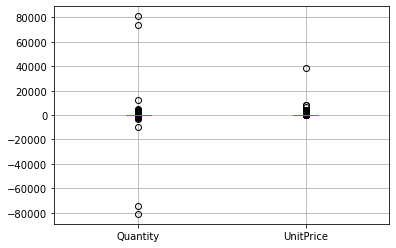

In [94]:
# Box Plot

data.boxplot(column=['Quantity','UnitPrice'])

- quantity 변수에 대해

In [99]:
q1 = data['Quantity'].quantile(0.25)
q3 = data['Quantity'].quantile(0.75)
iqr = q3-q1

In [100]:
data = data[(data['Quantity'] >= 0) & (data['Quantity'] < q3+1.5*iqr)] # 좌측 끝은 0으로 둠, Quantity가 0인 것이 말이 안됨

- UnitPrice 변수에 대해

In [101]:
q1 = data['UnitPrice'].quantile(0.25)
q3 = data['UnitPrice'].quantile(0.75)
iqr = q3-q1

In [102]:
data = data[(data['UnitPrice'] > q1-1.5*iqr) & (data['UnitPrice'] < q3+1.5*iqr)]

In [103]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


#### 1-3. 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성할 것  

In [106]:
# 범주형 데이터가 많기 때문에 처리 필요

In [108]:
# label encoding 필요
data['StockCode'].nunique() 
data['InvoiceNo'].nunique()
data['CustomerID'].nunique()
data['Country'].nunique()

3377

In [122]:
data_clus = data

In [123]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
data_clus['StockCode'] = enc.fit_transform(data['StockCode'])

enc = LabelEncoder()
data_clus['InvoiceNo'] = enc.fit_transform(data['InvoiceNo'])

enc = LabelEncoder()
data_clus['CustomerID'] = enc.fit_transform(data['CustomerID'])

enc = LabelEncoder()
data_clus['Country'] = enc.fit_transform(data['Country'])

In [125]:
from sklearn.preprocessing import MinMaxScaler

enc = MinMaxScaler()
data_clus[['Quantity', 'UnitPrice']] = enc.fit_transform(data_clus[['Quantity', 'UnitPrice']])

In [129]:
data_clus = data_clus.drop(columns = ['Description', 'InvoiceDate'])

In [130]:
data_clus

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country
0,0,3017,0.185185,0.341823,3890,35
1,0,2465,0.185185,0.454424,3890,35
2,0,2661,0.259259,0.368633,3890,35
3,0,2613,0.185185,0.454424,3890,35
4,0,2612,0.185185,0.454424,3890,35
...,...,...,...,...,...,...
541904,16828,1402,0.407407,0.113941,269,13
541905,16828,1636,0.185185,0.281501,269,13
541906,16828,1949,0.111111,0.556300,269,13
541907,16828,1950,0.111111,0.556300,269,13


In [163]:
# k-means

from sklearn.cluster import KMeans

k=5
kmeans = KMeans(n_clusters=k)
y_pred_km = kmeans.fit_predict(data_clus)

In [164]:
pd.Series(y_pred_km).value_counts()

2    75772
1    71844
3    64922
4    63253
0    61916
dtype: int64

In [197]:
# DBSCAN

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)

In [198]:
y_pred_db = dbscan.fit_predict(data_clus)

In [199]:
pd.Series(y_pred_db).value_counts()

-1     337582
 13        20
 12        12
 15         8
 17         6
 3          6
 5          6
 6          6
 7          6
 11         5
 16         5
 14         5
 9          5
 10         5
 0          5
 8          5
 4          5
 2          5
 1          5
 18         5
dtype: int64

#### 2-1. 위에서 생성한 군집들의 특성을 분석할 것 

In [162]:
# kmeans: k를 직접 지정, 모든 관측치가 최소 하나의 클러스터에 속함
# DBSCAN: k 설정 필요 없음, 그러나 너무 많은 군집이 출력될 수도, 클러스터에 해당되지 않는 관측치가 많음, 뭉쳐있지 않기 때문

#### 2-2. 각 군집 별 대표추천 상품을 도출할 것

In [200]:
data['clus_km'] = y_pred_km
data['clus_db'] = y_pred_db

In [ ]:
data['StockCode']  = data['StockCode'].astype(str) # string으로 stock code 바꾸고

In [191]:
data.groupby('clus_km').agg(pd.Series.mode)

## kmeans 기준
# 0 클러스터는 PARTY BUNTING
# 1 클러스터는 RABBIT NIGHT LIGHT
# 2 클러스터는 HOT WATER BOTTLE KEEP CALM
# 3 클러스터는 SPOTTY BUNTING
# 4 클러스터는 WHITE HANGING HEART T-LIGHT HOLDER

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,clus_db
clus_km,,,,,,,,,
0,3755,2416,PARTY BUNTING,0.407407,2011-03-20 13:33:00,0.16756,3885,35,-1
1,14717,1794,RABBIT NIGHT LIGHT,0.000000,2011-11-14 15:27:00,0.16756,1252,35,-1
2,13645,2034,HOT WATER BOTTLE KEEP CALM,0.407407,2011-10-31 14:09:00,0.16756,1252,35,-1
3,9206,1983,SPOTTY BUNTING,0.407407,2011-08-01 17:37:00,0.22118,3885,35,-1
4,2274,3017,WHITE HANGING HEART T-LIGHT HOLDER,0.000000,2011-02-02 17:06:00,0.16756,3885,35,-1


In [201]:
data.groupby('clus_db').agg(pd.Series.mode)

## DBSCAN 기준

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,clus_km
clus_db,,,,,,,,,
-1,14717,3017,WHITE HANGING HEART T-LIGHT HOLDER,0.000000,2011-11-14 15:27:00,0.167560,3885,35,2
0,33,553,12 DAISY PEGS IN WOOD BOX,0.037037,2010-12-01 11:49:00,0.221180,3944,35,4
1,352,2462,HI TEC ALPINE HAND WARMER,0.000000,2010-12-05 16:24:00,0.221180,607,35,4
2,496,1379,PACK OF 6 BIRDY GIFT TAGS,0.000000,2010-12-07 15:39:00,0.167560,3708,35,4
3,794,737,BATH BUILDING BLOCK WORD,0.000000,2010-12-12 14:27:00,0.797587,1915,35,4
4,795,1526,FELTCRAFT PRINCESS CHARLOTTE DOLL,0.000000,2010-12-12 16:05:00,0.502681,3726,35,4
5,1450,737,BATH BUILDING BLOCK WORD,0.000000,2011-01-09 12:53:00,0.797587,3116,35,4
6,1679,736,LOVE BUILDING BLOCK WORD,0.000000,2011-01-16 16:25:00,0.797587,2370,35,4
7,1679,735,HOME BUILDING BLOCK WORD,0.000000,2011-01-16 16:25:00,0.797587,2370,35,4


#### 2-3. CustomerID가 12413인 고객을 대상으로 상품을 추천할 것

In [206]:
data[data['CustomerID'] == 2002] # 가 속한 클러스터 2의 대표 상품으로 추천

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,clus_km,clus_db
360105,11557,616,RED HEART SHAPE LOVE BUCKET,0.000000,2011-09-25 16:05:00,0.395442,2002,35,2,-1
360106,11557,2530,LARGE CIRCULAR MIRROR MOBILE,0.037037,2011-09-25 16:05:00,0.167560,2002,35,2,-1
360107,11557,2991,CHARLIE+LOLA MY ROOM DOOR SIGN,0.185185,2011-09-25 16:05:00,0.052279,2002,35,2,-1
360108,11557,987,FOOD CONTAINER SET 3 LOVE HEART,0.000000,2011-09-25 16:05:00,0.261394,2002,35,2,-1
360109,11557,1152,ROUND SNACK BOXES SET OF 4 FRUITS,0.000000,2011-09-25 16:05:00,0.395442,2002,35,2,-1
...,...,...,...,...,...,...,...,...,...,...
360181,11557,1282,EMPIRE UNION JACK TV DINNER TRAY,0.037037,2011-09-25 16:05:00,0.663539,2002,35,2,-1
360182,11557,1279,TV DINNER TRAY VINTAGE PAISLEY,0.037037,2011-09-25 16:05:00,0.663539,2002,35,2,-1
360183,11557,3272,ANT SILVER LIME GREEN BOUDICCA RING,0.000000,2011-09-25 16:05:00,0.395442,2002,35,2,-1
360184,11557,3317,5 STRAND GLASS NECKLACE CRYSTAL,0.000000,2011-09-25 16:05:00,0.851206,2002,35,2,-1


### 3. 불량률이 0.9인 경우, 오차의 한계가 5%가 되도록하는 최소 표본 사이즈는?

In [210]:
import math
import scipy

In [ ]:
# 불량률이 0.9
# 이항분포 정규근사

# 평균: n*0.9
# 분산: n*0.9*0.1

# 오차의 한계 = z(95) * sigma / n^(1/2)

In [216]:
scipy.stats.norm(0,1).pdf(0.95)

0.254059056469189

In [233]:
scipy.stats.norm(0,1).cdf(1.96) # 0.95, 양옆 0.025씩

0.9750021048517795

In [240]:
# 표준오차 = (variance / n) ** 0.5 = sigma / (n**0.5)
#        = (p * (1 - p) / n) ** 0.5 (이항분포 정규근사)

# 정규근사에서 평균 = n*p, 분산 = n*p*(1-p)

p = 0.9
n = 35

(p*(1-p)/n)**0.5

# 최종 n = 35

0.05070925528371099

### 4. 지역별 특정 후보에 대한 지지율 차이가 있는지 여부에 대한 검정 문제

In [ ]:
# 세 집단이므로 분산 분석이 필요함



#### 4-1. 지역별 지지율 차이에 대한 연구가설과 귀무가설 설정하기

#### 4-2. 검정통계량을 구하고 가설 판단하기